<a href="https://colab.research.google.com/github/hamidsadeghi68/face-clustering/blob/main/face_detection_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **install requirements**

In [1]:
# install mtcnn package on colab machine
!pip install mtcnn # current version: mtcnn-0.1.1

     |████████████████████████████████| 2.3 MB 5.4 MB/s 


# **download sample image**

In [2]:
# download a sample facial image from my github page into the colab machine
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg

--2022-01-04 06:28:03--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg [following]
--2022-01-04 06:28:03--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28125 (27K) [image/jpeg]
Saving to: ‘hamid1.jpeg’

hamid1.jpeg         100%[===================>]  27.47K  --.-KB/s    in 0.002s  

2022-01-04 06:28:03 (17.0 MB/s) - ‘hamid1.jpeg’ saved [28125/28125]



# **MTCNN Face Detection**

In [3]:
import cv2
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow

In [11]:
detector = MTCNN()
img = cv2.imread("hamid1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(img)
print(result)
print(result[0]['confidence'])

[{'box': [77, 74, 94, 130], 'confidence': 0.9999765157699585, 'keypoints': {'left_eye': (109, 121), 'right_eye': (152, 124), 'nose': (134, 156), 'mouth_left': (107, 173), 'mouth_right': (145, 174)}}]
0.9999765157699585


display result:

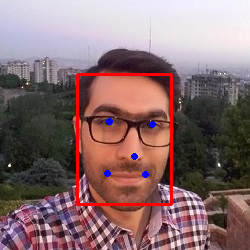

In [12]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (255, 0, 0), 2)

for point_name in keypoints:
  cv2.circle(img, keypoints[point_name], 2, (0, 0, 255), 2)

cv2_imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# **False Accept**

In [10]:
# download a sample object image from my github page into the colab machine
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/203.bmp

--2022-01-04 06:31:40--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/203.bmp
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/203.bmp [following]
--2022-01-04 06:31:40--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/203.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40792 (40K) [image/bmp]
Saving to: ‘203.bmp’

203.bmp             100%[===================>]  39.84K  --.-KB/s    in 0.003s  

2022-01-04 06:31:40 (12.5 MB/s) - ‘203.bmp’ saved [40792/40792]



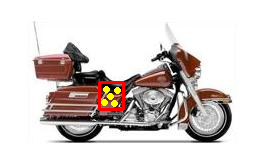

[{'box': [99, 82, 24, 27], 'confidence': 0.7217326164245605, 'keypoints': {'left_eye': (106, 89), 'right_eye': (117, 90), 'nose': (110, 96), 'mouth_left': (104, 102), 'mouth_right': (114, 103)}}]
0.7217326164245605


In [13]:
img = cv2.cvtColor(cv2.imread("203.bmp"), cv2.COLOR_BGR2RGB)
result = detector.detect_faces(img)
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (255, 0, 0), 2)

for point_name in keypoints:
  cv2.circle(img, keypoints[point_name], 2, (255, 255, 0), 2)

cv2_imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
print(result)
print(result[0]['confidence'])

A suitable **thresholding** can be utilized on **confidence** value to reduce FA (False Accept) rate.

```
if confidence > threshold: 
  accept the box
else:
  reject the box
```
**⬆ threshold:   ⬇ FA,   ⬆ FR** (FA: False Accept, FR: False Reject)

**⬇ threshold:   ⬆ FA,   ⬇ FR**


**True/False** can be calculated via Intersection over Union (**IoU**):

Figure: Correia, J., et. al, "Evolutionary Data Augmentation in Deep Face Detection," 2019.


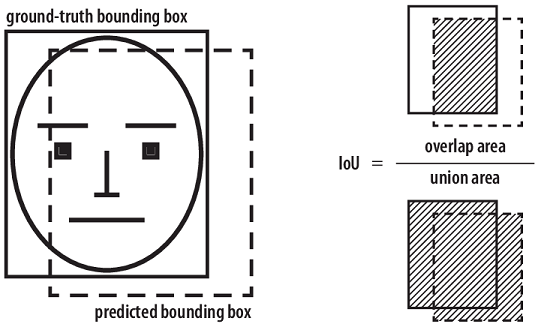

# **False Reject**

In [14]:
# download two sample images from my github page into the colab machine
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hard%20face%201.jpg
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hard%20face%202.jpg

--2022-01-04 06:52:10--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hard%20face%201.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hard%20face%201.jpg [following]
--2022-01-04 06:52:10--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hard%20face%201.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43028 (42K) [image/jpeg]
Saving to: ‘hard face 1.jpg’

hard face 1.jpg     100%[===================>]  42.02K  --.-KB/s    in 0.009s  

2022-01-04 06:52:10 (4.41 MB/s) - ‘hard f

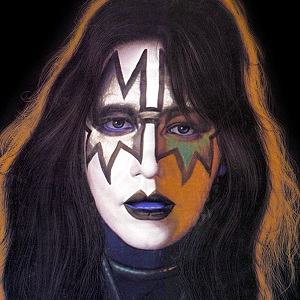

[]


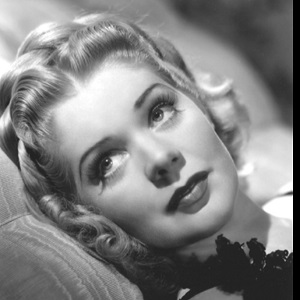

[]


In [15]:
img = cv2.cvtColor(cv2.imread("hard face 1.jpg"), cv2.COLOR_BGR2RGB)
result = detector.detect_faces(img)
cv2_imshow(img)
print(result)

img = cv2.cvtColor(cv2.imread("hard face 2.jpg"), cv2.COLOR_BGR2RGB)
result = detector.detect_faces(img)
cv2_imshow(img)
print(result)

# **references**:

[1] Zhang, Kaipeng, et al. "Joint face detection and alignment using multitask cascaded convolutional networks." *IEEE Signal Processing Letters* 23.10 (2016): 1499-1503.

[2] https://github.com/ipazc/mtcnn